# Normal XG Boost with the Bert Data 

In [1]:
#S-0) Importing the necessary Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor

C:\Users\renuk\anaconda3\envs\harbar\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


# Importing the data

Training the model without shuffling the input data

In [8]:
bert_x = pd.read_csv('x_train_ACFqOMF.csv')
bert_y = pd.read_csv('y_train_HNMbC27.csv',index_col = 0)
bert_x_test  = pd.read_csv('x_test_pf4T2aK.csv')
random_submission = pd.read_csv('random_submission_example.csv', index_col = 0)
bert_x_train,bert_x_val,bert_y_train,bert_y_val = train_test_split(bert_x,bert_y,train_size = 0.8,shuffle = False)

In [15]:
print(bert_x_train.shape) Inp
print(bert_y_train.shape) Out
print(bert_x_test.shape) Inp : 6/4
415,39 : 6/4

(1619, 768)
(1619, 39)
(415, 768)


In [10]:
bert_x_train

,embed_0,embed_1,embed_2,embed_3,embed_4,embed_5,embed_6,embed_7,embed_8,embed_9,...,embed_758,embed_759,embed_760,embed_761,embed_762,embed_763,embed_764,embed_765,embed_766,embed_767
0,-0.593896,-0.064762,0.037443,-0.204985,-0.020191,-0.011442,-0.037963,-0.298239,-0.040236,0.546839,...,-0.184453,-0.199293,0.051006,0.270629,-0.070993,-0.049700,0.183429,-0.659867,0.085300,0.090459
1,-0.089499,-0.166100,0.122766,0.104867,0.008371,-0.074680,0.052226,0.569398,-0.029840,-0.033208,...,-0.246565,0.083387,-0.132592,-0.766148,-0.323153,-0.453999,0.173123,0.281454,-0.064343,-0.133666
2,0.013104,-0.290522,0.461759,-0.005823,0.055795,-0.102498,0.061132,0.434192,-0.164281,0.076892,...,0.019520,0.224350,-0.093638,-0.382246,-0.217971,-0.454239,0.082005,0.124396,-0.011094,-0.210619
3,-0.454174,0.121775,0.191489,-0.048016,-0.105496,-0.216831,-0.173918,-0.101547,-0.209740,0.015478,...,-0.359921,-0.006138,-0.038534,0.297223,0.057184,0.321524,-0.344735,-0.362957,-0.032909,0.134404
4,-0.471450,-0.109883,0.199362,-0.114269,-0.105862,-0.126005,0.099511,-0.063115,0.063890,0.042452,...,-0.086798,-0.128025,0.083945,0.260165,-0.056105,0.339414,-0.006278,-0.446322,-0.017794,-0.002816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1614,-0.243373,-0.027258,0.096287,-0.185371,-0.393311,0.079776,-0.108790,0.265602,0.103273,0.303618,...,-0.259550,0.059597,0.146899,0.177783,-0.071019,-0.267914,0.395459,-0.273114,0.009224,-0.224204
1615,-0.083569,-0.169147,0.109032,-0.360755,-0.048671,-0.126569,0.260053,0.108402,-0.012138,0.160421,...,-0.062912,0.145780,0.140720,-0.254386,-0.075401,-0.213626,0.366412,-0.174309,0.144730,-0.328432
1616,-0.556751,-0.142130,0.168117,-0.168494,-0.017123,0.057328,0.141587,-0.091136,0.137483,0.055062,...,0.263235,0.209520,-0.089775,0.343396,-0.152058,0.176508,0.145433,-0.357442,0.091661,0.359638
1617,-0.652777,-0.092177,0.165587,-0.149536,-0.106974,0.239422,0.195469,-0.114583,0.098860,-0.055446,...,-0.307012,0.238408,-0.133939,0.119817,0.174391,0.167489,0.242845,-0.387507,-0.150356,0.276186


In [11]:
bert_y_train

,Diff_VIX_1d,Diff_VIX_1w,Diff_VIX_2w,Diff_V2X_1d,Diff_V2X_1w,Diff_V2X_2w,Diff_EURUSD_1d,Diff_EURUSD_1w,Diff_EURUSD_2w,Diff_EURUSDV1M_1d,...,Diff_SPX_2w,Diff_SRVIX_1d,Diff_SRVIX_1w,Diff_SRVIX_2w,Diff_CVIX_1d,Diff_CVIX_1w,Diff_CVIX_2w,Diff_MOVE_1d,Diff_MOVE_1w,Diff_MOVE_2w
0,0.09,0.91,0.78,-0.4476,0.2496,1.1221,0.0067,-0.0038,-0.0053,0.0250,...,-24.41,0.00,0.00,0.00,0.060258,-0.182817,0.09745,0.4500,-0.5500,1.8500
1,0.40,-0.01,3.83,2.4391,-0.7112,6.1795,-0.0048,0.0034,-0.0046,-0.3675,...,-61.86,-0.16,-0.97,-0.17,-0.120000,0.090000,0.92000,-0.1082,0.9718,1.9018
2,-1.54,1.86,1.56,-0.3430,2.2993,2.3575,-0.0016,0.0039,-0.0088,-0.3150,...,-48.17,0.10,3.02,3.74,-0.140000,0.170000,0.20000,-0.2249,-0.3166,2.8408
3,-0.06,-0.99,3.58,-0.2026,-2.4894,2.0213,-0.0099,-0.0212,-0.0409,-0.3350,...,-23.16,0.00,0.00,0.00,-0.383900,-0.175300,-0.75820,1.1000,-11.0000,5.6000
4,0.14,-0.07,1.69,0.2685,1.3956,3.3027,-0.0059,-0.0352,-0.0420,0.0150,...,-40.07,-0.05,2.20,6.30,-0.170000,0.090000,1.37000,0.5353,11.5193,25.4624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1614,-0.07,-1.91,-0.33,0.3534,-3.5801,-4.5860,-0.0023,-0.0066,0.0011,-0.3400,...,13.32,0.24,-0.38,0.63,-0.330000,-0.920000,-0.56000,-0.2819,-4.7771,-0.4958
1615,-1.26,-0.31,-8.01,0.1307,0.0462,-2.6543,0.0020,0.0097,0.0085,-0.2425,...,37.50,0.01,-0.75,-2.46,-0.140000,-0.310000,-0.97000,-1.9156,0.0396,-14.3860
1616,-0.63,1.50,0.40,-0.3426,1.4305,0.1979,-0.0093,-0.0141,-0.0211,0.2500,...,-2.83,1.39,4.12,3.48,0.280000,1.520000,0.90000,1.4067,16.7837,6.2195
1617,0.14,0.32,-4.64,0.1893,1.8998,-1.5854,-0.0167,-0.0061,0.0304,0.4475,...,45.30,0.00,0.00,0.00,0.004400,0.471000,-0.59420,0.7000,-0.7000,-11.3000


In [12]:
bert_x_val

,embed_0,embed_1,embed_2,embed_3,embed_4,embed_5,embed_6,embed_7,embed_8,embed_9,...,embed_758,embed_759,embed_760,embed_761,embed_762,embed_763,embed_764,embed_765,embed_766,embed_767
1619,-0.504543,-0.238862,0.268207,-0.195398,-0.129295,-0.071738,-0.071930,-0.078853,0.193799,0.312561,...,-0.078656,-0.016189,0.005497,0.196333,-0.178815,0.025027,-0.060292,-0.433548,0.046218,0.099468
1620,-0.476096,-0.214239,-0.063099,-0.076593,-0.299466,-0.026293,-0.101854,0.181612,-0.097852,0.107278,...,-0.084571,0.052774,0.167772,0.129893,-0.125352,-0.338464,0.123560,-0.251659,0.034861,-0.264190
1621,-0.110859,0.055071,-0.044472,-0.087786,-0.168676,0.216177,0.356343,0.203279,-0.012863,-0.026753,...,0.165248,0.271330,0.153580,-0.144125,-0.126144,-0.044800,0.281531,0.094203,0.042266,0.203444
1622,-0.505651,-0.113361,0.225261,-0.311196,0.022356,-0.122159,0.551452,-0.142533,0.048752,0.323749,...,-0.121238,0.069174,0.016471,0.303918,-0.078248,0.339804,0.009332,-0.463689,-0.051655,0.500953
1623,-0.285427,-0.194134,0.210919,-0.336343,-0.128640,-0.272865,0.151891,-0.141799,0.161796,-0.075188,...,-0.039959,0.229610,0.049388,0.244578,-0.055200,0.514541,0.139084,-0.193043,-0.010445,0.225701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,-0.134108,-0.142738,0.077398,-0.052656,-0.223050,-0.024748,0.051775,0.225418,0.016313,0.203651,...,-0.153466,0.119594,0.041444,-0.234165,0.024491,-0.309568,0.324702,-0.276497,-0.004959,-0.320971
2020,-0.195736,-0.387907,0.320228,0.165131,-0.110947,-0.112957,0.218435,0.383855,-0.047947,0.187719,...,0.206781,-0.097978,-0.012083,-0.240991,0.008867,-0.388769,0.221236,-0.012026,0.026120,-0.178799
2021,-0.175762,-0.019424,-0.084928,-0.072786,-0.068806,-0.081929,-0.045627,0.274146,0.235335,0.114931,...,-0.280163,0.069029,0.146151,-0.255648,-0.111431,-0.251150,0.245139,-0.012150,0.026396,-0.624170
2022,0.094857,-0.019395,0.125970,-0.028764,-0.241570,-0.020699,-0.032222,0.003480,0.209894,0.165685,...,-0.239647,0.025610,-0.003960,0.016724,-0.043390,-0.004722,0.162544,-0.059068,0.221578,0.111782


# Training the Model

In [19]:
print(bert_x_train.shape,bert_y_train.shape,bert_x_val.shape,bert_y_val.shape)
print(bert_x.shape,bert_y.shape)

(1619, 768) (1619, 39) (405, 768) (405, 39)
(2024, 768) (2024, 39)


In [13]:
# Define the model
bert_model = XGBRegressor(n_estimators=100,max_depth = 5,learning_rate = 0.1, subsample = 0.7, colsample_bytree = 0.8, scoring = 'neg_mean_squared_error') #16695.37712703339
# Your code here

multioutputregressor = MultiOutputRegressor(bert_model)
# Fit the model
multioutputregressor.fit(bert_x_train,bert_y_train) # Your code here

# Get predictions
bert_predictions = multioutputregressor.predict(bert_x_val)# Your code here

# Calculate MAE
error = mae(bert_predictions,bert_y_val,multioutput='raw_values') # Your code here

# Uncomment to print MAE
print("Mean Absolute Error for each collumn:" , error)
print(f"Mean of mae: {np.mean(error)}")

# Check your answer
#step_2.check()
#LR: 1= 1116.448, 0.01 = 480.97, 0.1 = 333.445
#n_est: 10 = 487.954, 100 = 333.445, 1000 = 333.424
#max_depth: 10 = 340.772, 5 = 333.445, 1 = 356.496


C:\Users\renuk\anaconda3\envs\harbar\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12:40:18] WARNING: ..\src\learner.cc:576: 
Parameters: { "scoring" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:40:27] WARNING: ..\src\learner.cc:576: 
Parameters: { "scoring" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:40:38] WARNING: ..\src\learner.cc:576: 
Parameters: { "scoring" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting

[12:44:09] WARNING: ..\src\learner.cc:576: 
Parameters: { "scoring" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:44:19] WARNING: ..\src\learner.cc:576: 
Parameters: { "scoring" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:44:29] WARNING: ..\src\learner.cc:576: 
Parameters: { "scoring" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting

# Generating the Predictions 

In [14]:
# Calculate mse
error = mse(bert_predictions,bert_y_val,squared = False) # Your code here

# Uncomment to print MSE
print("Mean Squared Error:" , error)

Mean Squared Error: 8.085426296839545


# Generating a submission file

In [20]:
# Define the model
bert_model = XGBRegressor(n_estimators=100,max_depth = 5,learning_rate = 0.1, subsample = 0.7, colsample_bytree = 0.8, scoring = 'neg_mean_squared_error') #16695.37712703339
# Your code here

multioutputregressor = MultiOutputRegressor(bert_model)
# Fit the model
multioutputregressor.fit(bert_x_train,bert_y_train) # Your code here

# Get predictions
bert_predictions = multioutputregressor.predict(bert_x_test)# Your code here

final_df = pd.DataFrame(bert_predictions)


# Calculate MAE
#error = mae(bert_predictions,bert_y_val,multioutput='raw_values') # Your code here

# Uncomment to print MAE
#print("Mean Absolute Error for each collumn:" , error)
#print(f"Mean of mae: {np.mean(error)}")

# Check your answer
#step_2.check()
#LR: 1= 1116.448, 0.01 = 480.97, 0.1 = 333.445
#n_est: 10 = 487.954, 100 = 333.445, 1000 = 333.424
#max_depth: 10 = 340.772, 5 = 333.445, 1 = 356.496

C:\Users\renuk\anaconda3\envs\harbar\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13:04:58] WARNING: ..\src\learner.cc:576: 
Parameters: { "scoring" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:05:08] WARNING: ..\src\learner.cc:576: 
Parameters: { "scoring" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:05:18] WARNING: ..\src\learner.cc:576: 
Parameters: { "scoring" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting

[13:08:54] WARNING: ..\src\learner.cc:576: 
Parameters: { "scoring" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:09:04] WARNING: ..\src\learner.cc:576: 
Parameters: { "scoring" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:09:14] WARNING: ..\src\learner.cc:576: 
Parameters: { "scoring" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting

In [21]:
final_df = pd.DataFrame(bert_predictions)
final_df.columns = bert_y.columns
final_df.to_csv('final_submission_normal.csv')

# PCA Analysis

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from sklearn.feature_selection import mutual_info_regression


plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


df = bert_x

C:\Users\renuk\AppData\Local\Temp\ipykernel_50040\2864669567.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [24]:
X = df.copy()
# Standardize
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)
X_scaled

,embed_0,embed_1,embed_2,embed_3,embed_4,embed_5,embed_6,embed_7,embed_8,embed_9,...,embed_758,embed_759,embed_760,embed_761,embed_762,embed_763,embed_764,embed_765,embed_766,embed_767
0,-1.132859,0.235927,-1.003491,-0.385945,0.927168,0.091525,-1.047246,-1.408046,-0.817942,2.572402,...,-0.601924,-1.612896,0.390153,1.023965,0.317982,-0.034866,0.300078,-1.774429,0.692929,0.370231
1,0.819700,-0.582502,-0.397459,1.123959,1.131245,-0.378241,-0.508434,1.956197,-0.749808,-0.910111,...,-0.998827,0.232715,-0.882578,-2.714823,-1.618681,-1.380771,0.242622,1.991049,-0.289781,-0.445619
2,1.216888,-1.587361,2.010357,0.584568,1.470084,-0.584895,-0.455226,1.431938,-1.630935,-0.249087,...,0.701508,1.153062,-0.612544,-1.330411,-0.810849,-1.381573,-0.265321,1.362785,0.059910,-0.725743
3,-0.591983,1.742447,0.090673,0.378965,0.317660,-1.434233,-1.859474,-0.645377,-1.928874,-0.617804,...,-1.723199,-0.351788,-0.230554,1.119867,1.302416,1.200930,-2.644221,-0.586728,-0.083352,0.530201
4,-0.658860,-0.128480,0.146593,0.056112,0.315045,-0.759516,-0.225942,-0.496355,-0.135506,-0.455858,...,0.022115,-1.147587,0.618487,0.986228,0.432324,1.260486,-0.757462,-0.920205,0.015907,0.030697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,0.647018,-0.393823,-0.719694,0.356353,-0.522268,-0.007321,-0.511127,0.622422,-0.447320,0.511957,...,-0.403905,0.469110,0.323866,-0.796405,1.051328,-0.899965,1.087617,-0.240870,0.100192,-1.127444
2020,0.408448,-2.373868,1.005086,1.417626,0.278708,-0.662587,0.484542,1.236761,-0.868483,0.416301,...,1.898143,-0.951415,-0.047188,-0.821020,0.931331,-1.163624,0.510832,0.817070,0.304292,-0.609914
2021,0.485769,0.602093,-1.872669,0.258261,0.579810,-0.432095,-1.093030,0.811364,0.988146,-0.020705,...,-1.213526,0.138977,1.049710,-0.873876,0.007406,-0.705490,0.644083,0.816572,0.306107,-2.231138
2022,1.533358,0.602324,-0.374698,0.472779,-0.654592,0.022757,-1.012948,-0.238135,0.821407,0.284017,...,-0.954622,-0.144508,0.009117,0.108343,0.529980,0.114865,0.183648,0.628892,1.587869,0.447851


In [25]:
from sklearn.decomposition import PCA

# Create principal components
pca = PCA(n_components = 768)
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC759,PC760,PC761,PC762,PC763,PC764,PC765,PC766,PC767,PC768
0,3.932579,7.329417,-2.751820,1.568235,-0.988746,-8.319196,0.369681,-0.936013,2.602728,3.039498,...,-0.073868,0.010621,0.012393,-0.080470,-0.062773,-0.002626,0.015221,-0.007353,0.006455,-0.008472
1,-17.256109,1.160300,3.044332,5.445784,0.928240,6.439400,-2.993410,-5.782405,-1.293003,4.396071,...,0.044982,0.165225,0.000147,-0.029255,-0.002971,-0.022694,0.019825,-0.006647,0.021453,-0.001482
2,-16.554393,6.167798,-5.181880,-3.939465,-6.062320,4.199193,-3.427514,-1.499892,2.985803,-4.586354,...,-0.005592,-0.045352,0.123459,0.162576,-0.040528,0.033749,0.015356,0.093140,-0.024002,0.002430
3,7.769701,8.001141,-1.243169,-7.658419,-8.109180,-5.270768,1.168275,-3.003094,-0.559164,-2.577336,...,-0.017576,0.025144,-0.051896,-0.005026,0.016323,-0.057172,0.035462,-0.008540,-0.011897,-0.011945
4,7.276059,8.233653,-7.937291,1.966330,2.668436,-2.865685,-5.123681,4.219050,-2.528761,-4.128568,...,0.030663,0.017088,0.083009,0.004754,0.087520,-0.037655,0.004708,0.080913,0.018860,-0.003609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,-9.776784,7.656981,-0.383178,3.233537,0.573768,-0.396051,0.932863,-1.323615,-0.392267,-2.792933,...,-0.045847,0.108590,0.034041,-0.033642,-0.078081,-0.028919,-0.047905,-0.008000,-0.008123,-0.002937
2020,-11.573339,-0.505984,-2.392889,-4.928123,-8.457326,0.712204,-3.230417,3.640116,4.956814,-2.349592,...,0.013008,-0.016134,-0.049131,-0.021317,0.012974,-0.039677,0.034051,0.102813,-0.027205,0.022590
2021,-11.642615,4.392670,1.181121,1.385690,-2.297541,-1.017546,-1.283799,0.642947,-5.460137,2.281579,...,0.043959,-0.021854,0.011969,-0.032240,0.023254,-0.017986,0.050919,0.007248,0.096125,0.009457
2022,-4.384442,-1.080695,-1.352720,-5.156963,-0.277219,1.814832,-0.079863,8.373806,2.952255,8.703587,...,-0.051001,0.023040,0.038884,0.025406,0.015830,0.009743,0.005124,-0.069819,-0.013707,-0.014963


In [26]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC759,PC760,PC761,PC762,PC763,PC764,PC765,PC766,PC767,PC768
embed_0,-0.071264,-0.013447,0.034943,0.010703,-0.017508,0.027870,-0.041065,0.036139,0.021589,0.009141,...,0.064807,-0.021799,0.009693,0.069729,0.041310,-0.010661,-0.129586,-0.013226,-0.080841,-0.036325
embed_1,-0.002313,-0.009770,0.021504,-0.002578,-0.002046,-0.003664,0.014121,-0.036411,-0.082832,-0.012285,...,0.020114,-0.008795,0.008272,-0.012634,0.006413,0.005847,-0.027643,0.006962,0.010697,-0.023722
embed_2,0.005949,0.044613,-0.033442,-0.040395,-0.008392,0.021941,-0.027877,-0.037728,0.026993,-0.071286,...,-0.042722,-0.025484,0.020562,0.014664,-0.036509,-0.002701,-0.010558,0.035742,-0.032770,-0.017559
embed_3,-0.063614,-0.010072,0.006761,-0.022170,-0.051140,0.043547,-0.014315,0.011731,-0.021392,0.031417,...,0.007314,0.004989,-0.016455,-0.006445,0.049048,0.001261,0.030704,0.039555,0.006731,-0.047179
embed_4,-0.005764,0.010870,-0.058925,0.017393,0.013293,0.043203,-0.022454,0.054920,-0.062927,0.010469,...,-0.036687,0.006368,-0.015072,0.008923,0.006543,-0.004973,0.029980,0.021540,0.018703,-0.035338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
embed_763,0.069731,0.001394,-0.038800,-0.012346,0.069912,-0.026265,-0.022738,0.016637,-0.004296,-0.013029,...,0.084920,-0.167732,0.169014,-0.010689,-0.096995,0.166054,-0.032746,0.140699,-0.092625,0.015394
embed_764,-0.041379,-0.045619,-0.013781,0.004738,0.045491,-0.044980,0.026536,-0.015502,0.024366,-0.024860,...,0.041579,-0.071737,-0.038851,0.032381,0.013299,0.043958,0.007048,-0.004124,0.034585,-0.048378
embed_765,-0.076734,-0.022830,0.011302,-0.011763,0.010939,0.063528,-0.015568,0.015632,-0.003272,0.002525,...,0.008217,-0.065914,-0.066619,0.066716,0.111469,-0.003097,-0.009140,0.051531,0.019004,-0.065532
embed_766,0.007927,-0.042533,-0.007151,-0.012111,-0.032052,-0.001781,0.059603,0.028530,0.008068,0.080412,...,-0.031182,0.021839,0.008214,0.025819,0.010751,-0.003172,-0.023589,-0.010943,-0.019630,-0.028218


# Percent of Variance explained by each of the feature

In [ ]:
help(PCA)

In [27]:
print('Individual variance contributions:')
n_comp = 768
for j in range(n_comp):
    if pca.explained_variance_ratio_[j]>(0.0001):
        print(f"PCA_{j}:{pca.explained_variance_ratio_[j]}")

Individual variance contributions:
PCA_0:0.1536021506856803
PCA_1:0.058351161949277114
PCA_2:0.04781489684212397
PCA_3:0.03936577875556931
PCA_4:0.03881880619354415
PCA_5:0.03126309799975222
PCA_6:0.027488945174873148
PCA_7:0.021227917722217583
PCA_8:0.0208059456624421
PCA_9:0.01681845795186435
PCA_10:0.014808527713263034
PCA_11:0.014482075370848032
PCA_12:0.013986754044277764
PCA_13:0.012879782104239748
PCA_14:0.012224742407386208
PCA_15:0.011801402479708267
PCA_16:0.010825207014737735
PCA_17:0.010592824921636141
PCA_18:0.009656782598705638
PCA_19:0.009303899069784323
PCA_20:0.008857389761543908
PCA_21:0.008399982768213693
PCA_22:0.008029342463084791
PCA_23:0.0079180081537864
PCA_24:0.007408017680001944
PCA_25:0.00725866934383627
PCA_26:0.007177797490658531
PCA_27:0.006533027962465239
PCA_28:0.006394499467536697
PCA_29:0.006166058896865074
PCA_30:0.006082765450447249
PCA_31:0.005813602611953874
PCA_32:0.0056322599752156415
PCA_33:0.005590126053383434
PCA_34:0.005403186188882221
PCA_35

array([<AxesSubplot: title={'center': '% Explained Variance'}, xlabel='Component'>,
       <AxesSubplot: title={'center': '% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

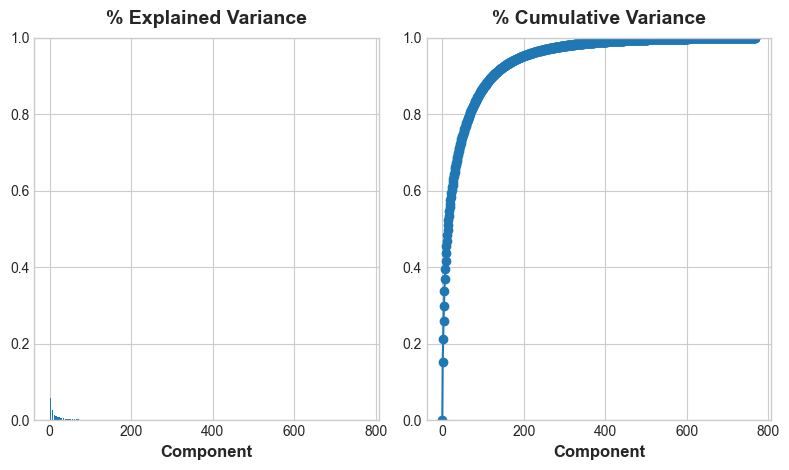

In [28]:
plot_variance(pca)

In [29]:
# As per the PCA, we will only select the first 500 Principal components since they capture most of the data variation.
bert_x_pca = X_pca.iloc[:,0:356]
bert_xpca_train,bert_xpca_val,bert_y_train,bert_y_val = train_test_split(bert_x_pca,bert_y,train_size = 0.8,shuffle = False)
# 100 = 367.98, 200 = 371.06, 300 = 375.25016, 356 = 368.67

In [30]:
bert_xpca_train.shape, bert_xpca_val.shape, bert_y_train.shape, bert_y_val.shape

((1619, 356), (405, 356), (1619, 39), (405, 39))

# Training the Model via Principal Components

In [31]:
# Define the model
bert_model = XGBRegressor(n_estimators=100,max_depth = 5,learning_rate = 0.1, subsample = 0.7, colsample_bytree = 0.8, scoring = 'neg_mean_squared_error') #16695.37712703339
# Your code here

multioutputregressor = MultiOutputRegressor(bert_model)
# Fit the model
multioutputregressor.fit(bert_xpca_train,bert_y_train) # Your code here

# Get predictions
bert_predictions = multioutputregressor.predict(bert_xpca_val)# Your code here

# Calculate MAE
error = mae(bert_predictions,bert_y_val,multioutput='raw_values') # Your code here

# Uncomment to print MAE
print("Mean Absolute Error for each collumn:" , error)
print(f"Mean of mae: {np.mean(error)}")

# Check your answer
#step_2.check()
#LR: 1= 1116.448, 0.01 = 480.97, 0.1 = 333.445
#n_est: 10 = 487.954, 100 = 333.445, 1000 = 333.424
#max_depth: 10 = 340.772, 5 = 333.445, 1 = 356.496

C:\Users\renuk\anaconda3\envs\harbar\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13:15:56] WARNING: ..\src\learner.cc:576: 
Parameters: { "scoring" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:15:57] WARNING: ..\src\learner.cc:576: 
Parameters: { "scoring" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:15:59] WARNING: ..\src\learner.cc:576: 
Parameters: { "scoring" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting

[13:16:33] WARNING: ..\src\learner.cc:576: 
Parameters: { "scoring" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:16:34] WARNING: ..\src\learner.cc:576: 
Parameters: { "scoring" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[13:16:36] WARNING: ..\src\learner.cc:576: 
Parameters: { "scoring" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting

In [32]:
bert_predictions.shape

(405, 39)

In [33]:
# Calculate MSE
error = mse(bert_predictions,bert_y_val,squared = False) # Your code here

# Uncomment to print MAE
print("Mean Squared Error:" , error)

Mean Squared Error: 8.87173859168831


# T-SNE Implementation

In [25]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

standarized_data = StandardScaler().fit_transform(bert_x)
model = TSNE(n_components=3, random_state=0,perplexity=300, n_iter=5000)
tsne_data = model.fit_transform(standarized_data)
tsne_data

C:\Users\renuk\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\renuk\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


array([[ 14.173868  ,  -2.8631666 ,  -2.442157  ],
       [-20.44047   ,  24.068691  , -26.820168  ],
       [-11.001228  ,  30.94191   ,  16.934595  ],
       ...,
       [-22.545082  ,  30.246454  ,   0.54643977],
       [ -7.4642067 ,  34.83593   ,  38.305206  ],
       [ -2.7085426 ,  22.54281   , -34.389935  ]], dtype=float32)

In [26]:
bert_xtsne_train,bert_xtsne_val,bert_y_train,bert_y_val = train_test_split(tsne_data,bert_y,train_size = 0.8,random_state = 1)
bert_xtsne_train.shape, bert_xtsne_val.shape, bert_y_train.shape, bert_y_val.shape

((1619, 3), (405, 3), (1619, 39), (405, 39))

In [27]:
# Define the model
bert_model = XGBRegressor(n_estimators=100,max_depth = 5,learning_rate = 0.1, subsample = 0.7, colsample_bytree = 0.8, scoring = 'neg_mean_squared_error') #16695.37712703339
# Your code here

multioutputregressor = MultiOutputRegressor(bert_model)
# Fit the model
multioutputregressor.fit(bert_xtsne_train,bert_y_train) # Your code here

# Get predictions
bert_predictions = multioutputregressor.predict(bert_xtsne_val)# Your code here

# Calculate MAE
error = mae(bert_predictions,bert_y_val,multioutput='raw_values') # Your code here

# Uncomment to print MAE
print("Mean Absolute Error for each collumn:" , error)
print(f"Mean of mae: {np.mean(error)}")

# Check your answer
#step_2.check()
#LR: 1= 1116.448, 0.01 = 480.97, 0.1 = 333.445
#n_est: 10 = 487.954, 100 = 333.445, 1000 = 333.424
#max_depth: 10 = 340.772, 5 = 333.445, 1 = 356.496

[20:23:46] WARNING: ..\src\learner.cc:576: 
Parameters: { "scoring" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:23:46] WARNING: ..\src\learner.cc:576: 
Parameters: { "scoring" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:23:46] WARNING: ..\src\learner.cc:576: 
Parameters: { "scoring" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting

[20:23:49] WARNING: ..\src\learner.cc:576: 
Parameters: { "scoring" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:23:49] WARNING: ..\src\learner.cc:576: 
Parameters: { "scoring" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:23:50] WARNING: ..\src\learner.cc:576: 
Parameters: { "scoring" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting

In [28]:
# Calculate MSE
error = mse(bert_predictions,bert_y_val,squared = False) # Your code here

# Uncomment to print MAE
print("Mean Squared Error:" , error)

Mean Squared Error: 10.410023659709722


In [35]:
bert_x_test.shape

(415, 768)

# Generating a final submission after doing the feature engineering

In [38]:
test = bert_x_test.copy()
# Standardize
test_scaled = (test - test.mean(axis=0)) / test.std(axis=0)
#test_scaled


from sklearn.decomposition import PCA
# Create principal components
pca = PCA(n_components = 415)
test_pca = pca.fit_transform(test_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(test_pca.shape[1])]
test_pca = pd.DataFrame(test_pca, columns=component_names)

#X_pca

print('Individual variance contributions:')
n_comp = 415
for j in range(n_comp):
    if pca.explained_variance_ratio_[j]>(0.0001):
        print(f"PCA_{j}:{pca.explained_variance_ratio_[j]}")

Individual variance contributions:
PCA_0:0.16094318150830933
PCA_1:0.06920581564615247
PCA_2:0.06000326516397064
PCA_3:0.04093293141602898
PCA_4:0.03989382100995152
PCA_5:0.03240482261903217
PCA_6:0.028258100494854003
PCA_7:0.02397404267356519
PCA_8:0.019572882581297527
PCA_9:0.018556125497287638
PCA_10:0.017636088054593647
PCA_11:0.015282525420235426
PCA_12:0.014578376341957492
PCA_13:0.014231887696992586
PCA_14:0.012679308106009753
PCA_15:0.011577257595629227
PCA_16:0.01135197426335047
PCA_17:0.010575312956668739
PCA_18:0.009900777082104314
PCA_19:0.009759447386183718
PCA_20:0.00929600036230121
PCA_21:0.008625086201322633
PCA_22:0.008281613801232823
PCA_23:0.007980709581364868
PCA_24:0.007826311318246945
PCA_25:0.007397439243302276
PCA_26:0.0072676805821751045
PCA_27:0.00698424247996524
PCA_28:0.006916521191706617
PCA_29:0.006543840049250633
PCA_30:0.006215565113468008
PCA_31:0.006109953303382062
PCA_32:0.005916229808545003
PCA_33:0.005767767209654851
PCA_34:0.005622354517315324
PCA_

array([<AxesSubplot:title={'center':'% Explained Variance'}, xlabel='Component'>,
       <AxesSubplot:title={'center':'% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

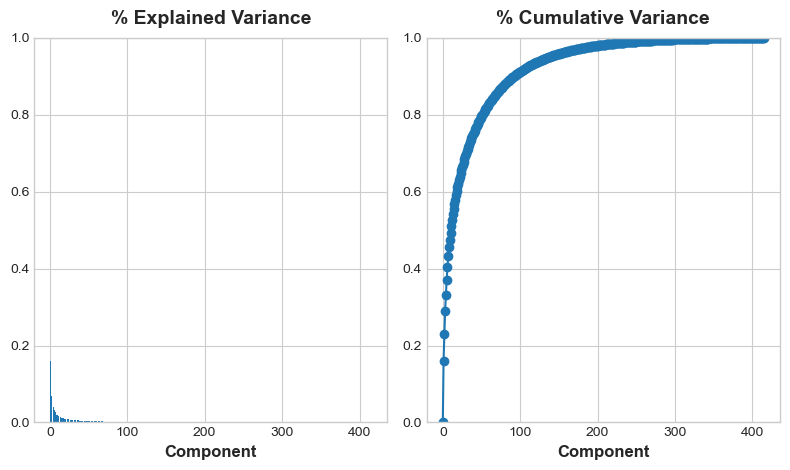

In [39]:
plot_variance(pca)

In [42]:
bert_x_test_pca = test_pca.iloc[:,:356]
bert_x_test_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC347,PC348,PC349,PC350,PC351,PC352,PC353,PC354,PC355,PC356
0,-5.607536,-1.682347,-7.015973,4.330058,-10.430326,1.448676,-0.339384,-4.611228,-6.788621,0.124128,...,0.122797,-0.035993,0.021245,-0.200851,-0.265693,-0.253483,-0.112400,-0.133370,0.304537,-0.063550
1,-3.538310,-3.150178,-7.407143,2.021023,-0.004542,-1.633807,1.738065,-2.154232,-1.976465,3.327816,...,-0.239402,0.223499,0.037284,0.030717,0.095446,0.119005,0.024348,0.031293,-0.077573,0.071014
2,-15.839628,4.202032,-7.473620,-3.989203,-0.965320,4.723331,4.754412,0.333156,-7.130679,3.160779,...,0.138348,-0.121853,0.008060,0.107734,-0.011509,0.166177,-0.009932,-0.237096,-0.168790,0.477852
3,-2.981441,-3.859699,7.544679,-9.073383,2.978680,-0.192978,-0.001371,-0.443693,1.448083,-1.900667,...,-0.010307,0.020917,0.316684,0.064382,0.169967,-0.110248,-0.436463,-0.094482,-0.396167,0.132111
4,-1.384403,-3.122986,-8.490395,1.313410,-6.997032,2.995715,6.490741,-8.289175,-4.474739,-0.075545,...,-0.183120,-0.285397,0.173588,0.027797,-0.065112,-0.034913,0.014787,-0.086154,-0.044431,0.005240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,10.425983,1.535229,-4.551858,5.880482,0.200096,-1.730529,1.564345,-9.085990,4.725697,3.724238,...,-0.064097,-0.167127,-0.033676,-0.102816,0.069599,0.147102,0.117062,0.056653,-0.086795,0.056485
411,3.283702,-3.405428,6.880994,-4.535354,3.572747,-0.137921,-4.267502,-4.196969,1.809773,1.672450,...,0.071849,0.085973,-0.419401,0.041343,-0.190247,-0.300575,-0.306367,0.153455,-0.137392,0.093190
412,-1.385950,-2.689048,9.674512,-2.941767,-1.034115,0.403298,-0.048209,-4.701085,-2.244827,-4.828343,...,0.098919,0.394296,0.129172,0.172837,0.148669,0.103528,-0.388466,0.201509,0.014009,-0.147310
413,0.541618,-5.999288,-4.645316,-5.452456,-3.989303,-0.751013,4.801612,7.150239,5.945537,-1.153986,...,0.232487,-0.034238,0.611768,-0.026796,0.053872,-0.113795,0.159599,0.142362,-0.002071,0.235167


In [43]:
# Final PCA implementations file on the test dataset
# Define the model
bert_model = XGBRegressor(n_estimators=100,max_depth = 5,learning_rate = 0.1, subsample = 0.7, colsample_bytree = 0.8, scoring = 'neg_mean_squared_error') #16695.37712703339
# Your code here

multioutputregressor = MultiOutputRegressor(bert_model)
# Fit the model
multioutputregressor.fit(bert_x_pca,bert_y) # Your code here

# Get predictions
bert_predictions = multioutputregressor.predict(bert_x_test_pca)# Your code here


bert_predictions
# # Calculate MAE
# error = mae(bert_predictions,bert_y_val,multioutput='raw_values') # Your code here

# # Uncomment to print MAE
# print("Mean Absolute Error for each collumn:" , error)
# print(f"Mean of mae: {np.mean(error)}")

# # Check your answer
# #step_2.check()
# #LR: 1= 1116.448, 0.01 = 480.97, 0.1 = 333.445
# #n_est: 10 = 487.954, 100 = 333.445, 1000 = 333.424
# #max_depth: 10 = 340.772, 5 = 333.445, 1 = 356.496

[20:55:41] WARNING: ..\src\learner.cc:576: 
Parameters: { "scoring" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:55:43] WARNING: ..\src\learner.cc:576: 
Parameters: { "scoring" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:55:45] WARNING: ..\src\learner.cc:576: 
Parameters: { "scoring" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting

[20:56:25] WARNING: ..\src\learner.cc:576: 
Parameters: { "scoring" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:56:27] WARNING: ..\src\learner.cc:576: 
Parameters: { "scoring" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:56:29] WARNING: ..\src\learner.cc:576: 
Parameters: { "scoring" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting

array([[ 1.1743492 ,  4.7892876 ,  6.800895  , ...,  0.28430042,
         5.980476  ,  7.1330895 ],
       [ 1.1190295 ,  3.0830994 ,  1.955303  , ..., -0.14808875,
         2.0956457 ,  9.084604  ],
       [-0.39958256,  0.50161624,  2.4947705 , ...,  0.51456773,
         1.074606  , -1.3440343 ],
       ...,
       [-0.8980709 ,  0.06025499, -5.3436737 , ...,  1.0374243 ,
        -5.4192557 , -8.594514  ],
       [ 0.98975474,  1.1734122 ,  0.7384171 , ..., -0.912478  ,
        -0.38347915,  2.086996  ],
       [ 0.26858583,  0.5745545 ,  2.0688338 , ...,  1.1316127 ,
         0.69402087,  4.5865593 ]], dtype=float32)

In [47]:
final_prediction = pd.DataFrame(bert_predictions)
final_prediction.columns = bert_y.columns
final_prediction.to_csv('final_submission.csv')